# Image Compression Using PCA

In [ ]:
#!pip install opencv-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2

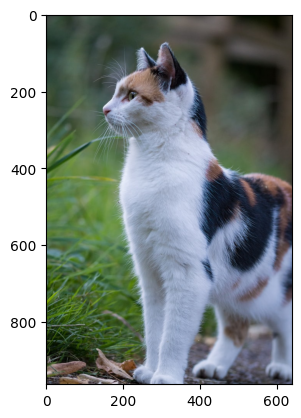

In [39]:
img = cv2.cvtColor(cv2.imread('cat.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [35]:
img.shape

(963, 640, 3)

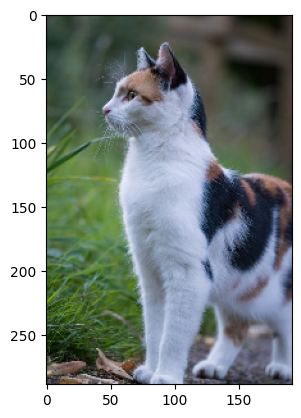

In [40]:
# resize the image for faster computation of PCA components and inverse tranformation
img = cv2.resize(img, None, fx = 0.3, fy = 0.3) # width and height 30 % of the original values
plt.imshow(img)
plt.show()

In [41]:
cv2.imwrite("resized_cat_image.png", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

True

In [11]:
img.shape

(289, 192, 3)

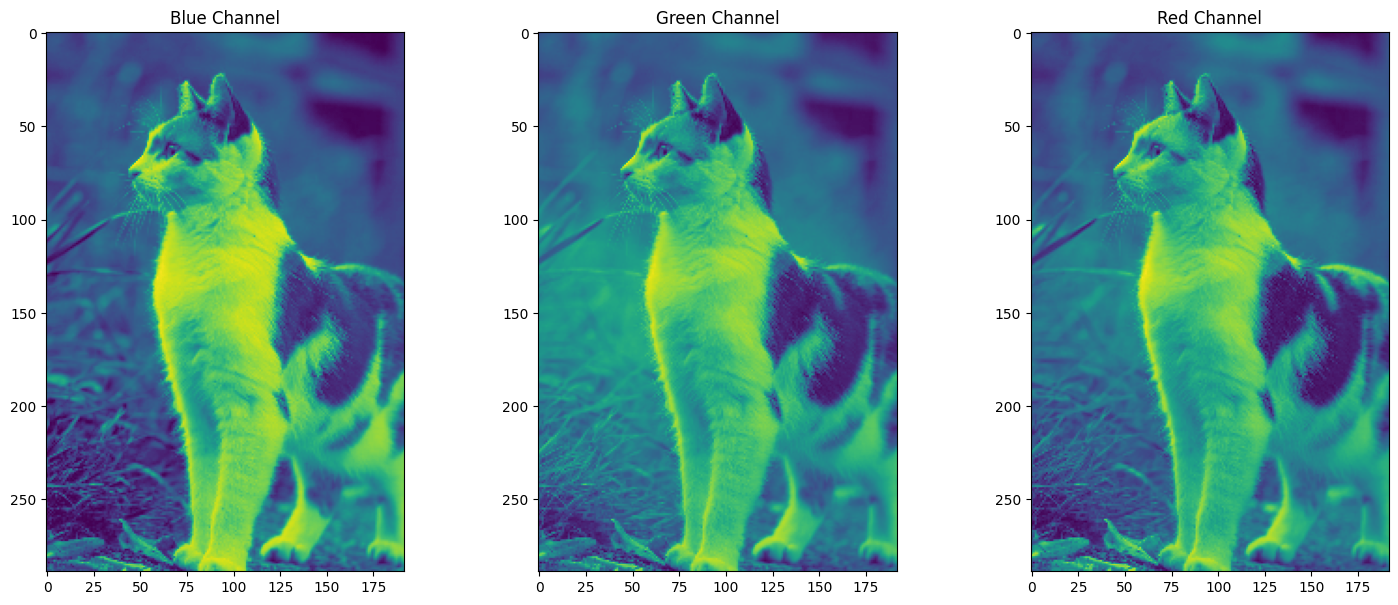

In [12]:
# Splitting into channels
red, green, blue = cv2.split(img)
# Plotting the images

fig = plt.figure(figsize = (18,7)) 

fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

In [13]:
df_blue = blue / 255
df_green = green / 255
df_red = red / 255

In [14]:
pca_b = PCA()
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA()
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA()
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [15]:
sum(pca_b.explained_variance_ratio_[:10]) # variance explained by the first 10 components

0.8809956369501953

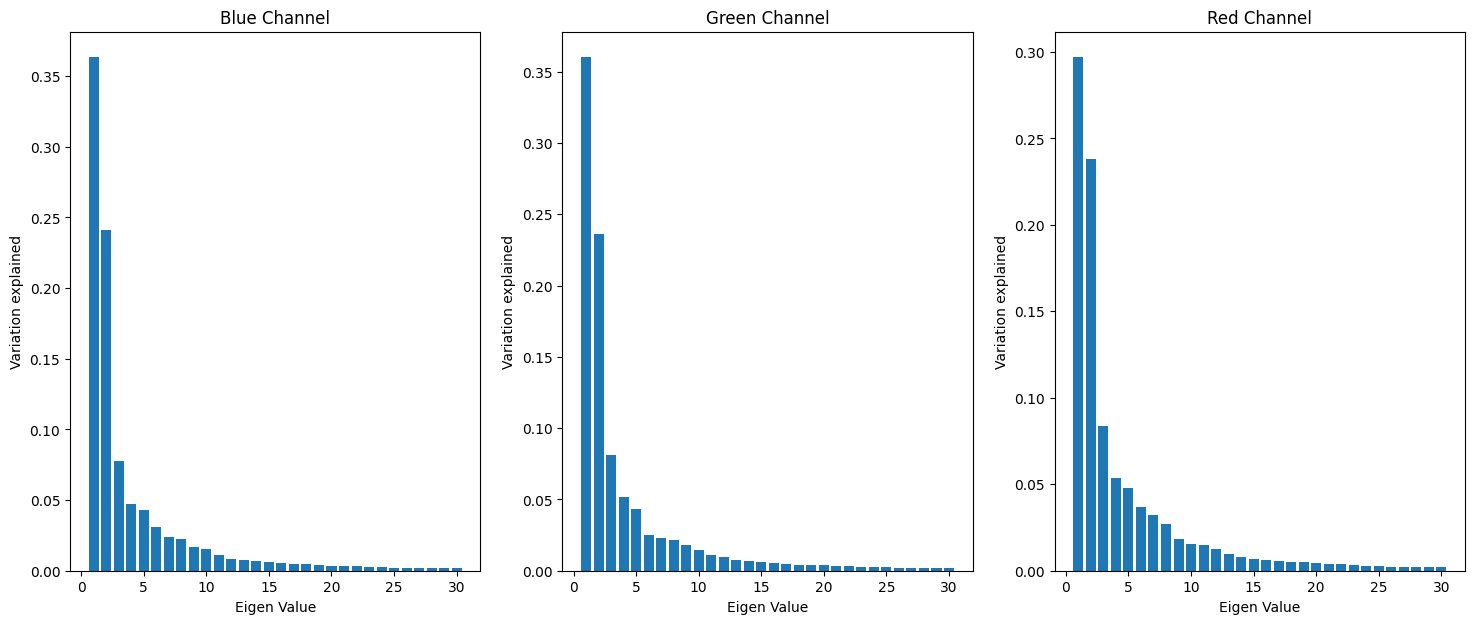

In [16]:
fig = plt.figure(figsize = (18, 7)) 
index_first_30 = list(range(1, 31))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(index_first_30,pca_b.explained_variance_ratio_[:30])

fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(index_first_30,pca_g.explained_variance_ratio_[:30])

fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(index_first_30, pca_r.explained_variance_ratio_[:30])
plt.show()

In [17]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_[:10])}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_[:10])}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_[:10])}")

Blue Channel : 0.8809956369501953
Green Channel: 0.8748197985751675
Red Channel  : 0.8502821548697636


In [19]:
def reconstruct_image(num_pca_components, interval_end = None):
    
    transformed = [trans_pca_b,trans_pca_g, trans_pca_r]
    copy_transformed = []
    for channel_data in transformed:
        channel_data_copy = channel_data.copy()
        if interval_end is None:
            channel_data_copy[:, num_pca_components:] = 0
        else:
            channel_data_copy[:, :num_pca_components-1] = 0
            channel_data_copy[:, interval_end:] = 0
        copy_transformed.append(channel_data_copy)

    b_arr = pca_b.inverse_transform(copy_transformed[0])
    g_arr = pca_g.inverse_transform(copy_transformed[1])
    r_arr = pca_r.inverse_transform(copy_transformed[2])

    img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
    img_reduced *= 255 # return to original scale
    #plt.imshow(img_reduced)
    if interval_end is None:
        cv2.imwrite(f"reduced_images/img_created_with_{num_pca_components}_pca_components.png", img_reduced)
    else:
        cv2.imwrite(f"reduced_images/img_created_with_{interval_end - num_pca_components + 1}_pca_components.png", img_reduced)


In [20]:
reconstruct_image(2) # two largest eigenvalues 

In [21]:
reconstruct_image(10) # ten largest eigenvalues

In [22]:
reconstruct_image(11, 100) # 11th through 100th eigenvalues

In [23]:
reconstruct_image(100) # 100 largest eigenvalues

In [26]:
reconstruct_image(pca_b.components_.shape[0] // 2) # first half of the eigenvalues

In [27]:
reconstruct_image(pca_b.components_.shape[0]) # all of the eigenvalues